## Notebook Overview
This notebook focuses on analyzing the coefficients from various models for different target variables, specifically drug usage data. It includes steps to normalize and visualize these coefficients to provide insights into the relationship between features and target variables.

I am filerting out 'Crack' as a target in this notebook due to not having enough datapoint causing huge imbalance in coefficent values as well not the models were not able to predict the minority class anyway.

## Data and Imbalance
The dataset used in this analysis is highly imbalanced, particularly for the drugs of primary interest such as Heroin and Crack. This imbalance can significantly affect the performance and interpretability of machine learning models. For instance, models may have high accuracy overall but fail to accurately predict the minority classes (e.g., users of less common drugs). This is reflected in the spread of coefficient values, which indicate the varying importance of different features across different targets.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Coefficient results csv
df = pd.read_csv('Coefficient Dataset.csv')

In [3]:
#Filetring out 'Target' drugs 'Crack' due significant data imbalancing
df = df[df['Target'] != 'Crack']

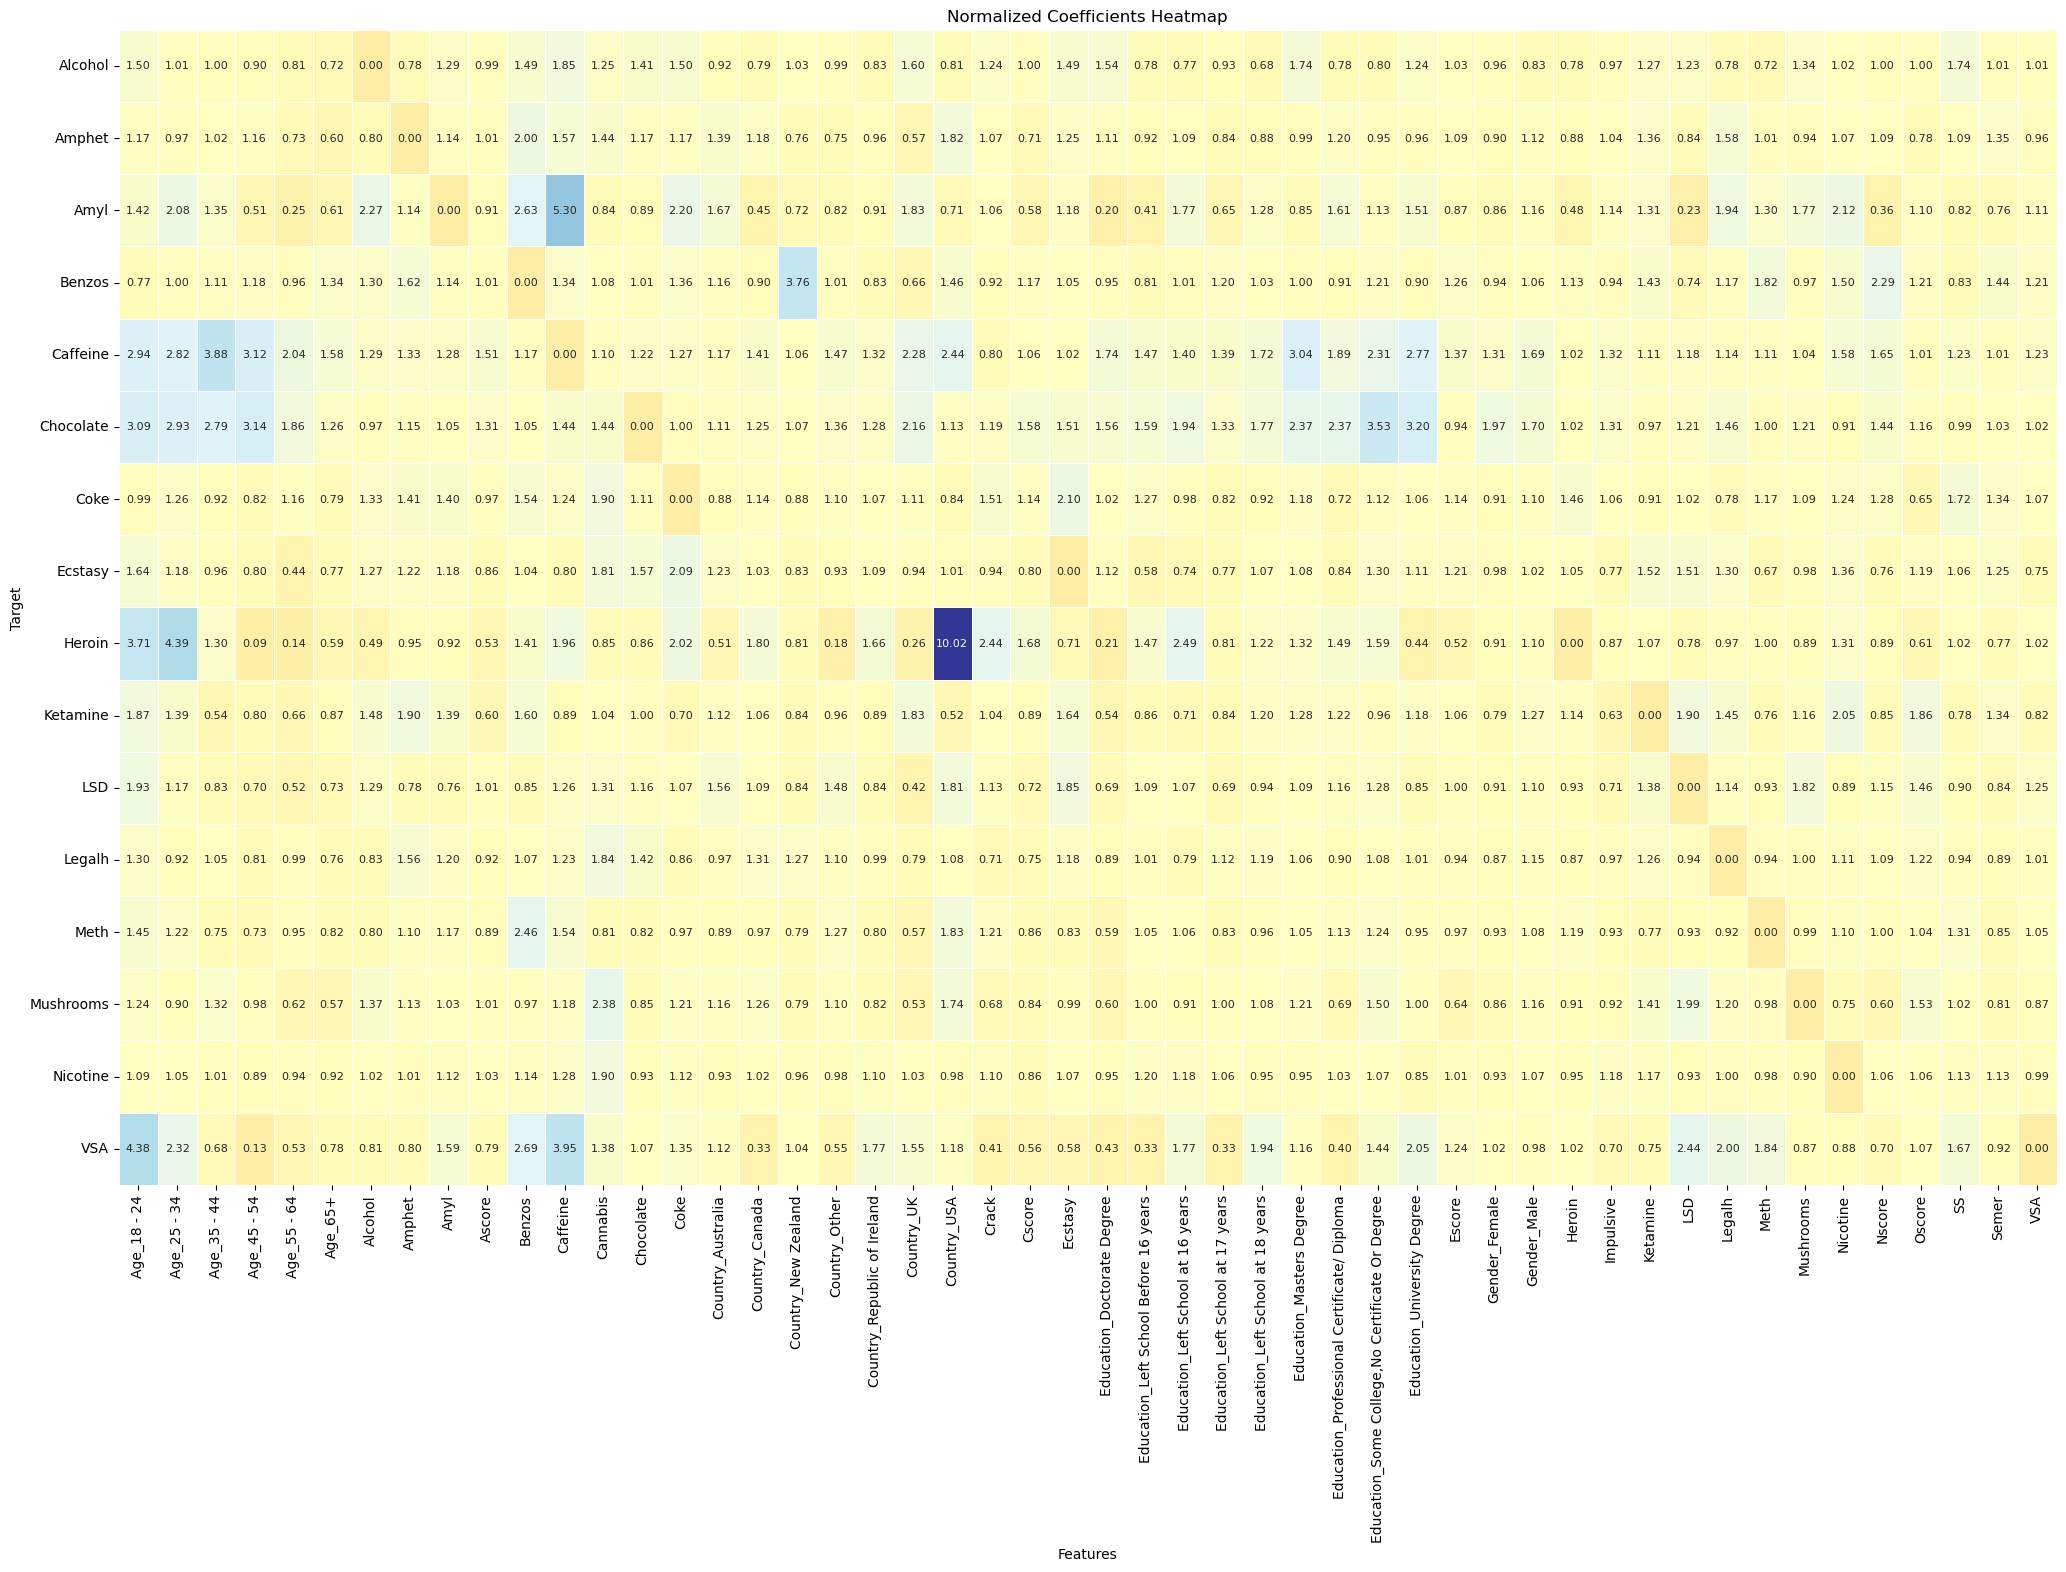

In [19]:
from sklearn.preprocessing import MinMaxScaler


# Normalize coefficients first
scaler = MinMaxScaler()
df['coefficients_scaled'] = scaler.fit_transform(df[['coefficients']])

# Filter coefficients greater than 1 after scaling
filtered_df = df[df['coefficients'] >=0]

#pivot_df1 = filtered_df.to_csv('Scaled_coefficient.csv')

# Pivot the filtered dataframe for heatmap
pivot_df = filtered_df.pivot(index='Target', columns='Features', values='coefficients')

# Plotting the heatmap with adjusted settings
plt.figure(figsize=(25, 15))
sns.heatmap(pivot_df.round(2), annot=True, cmap='RdYlBu', cbar=False, fmt=".2f",center=1,linewidths=.7, annot_kws={"size": 8})
plt.title('Normalized Coefficients Heatmap')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()



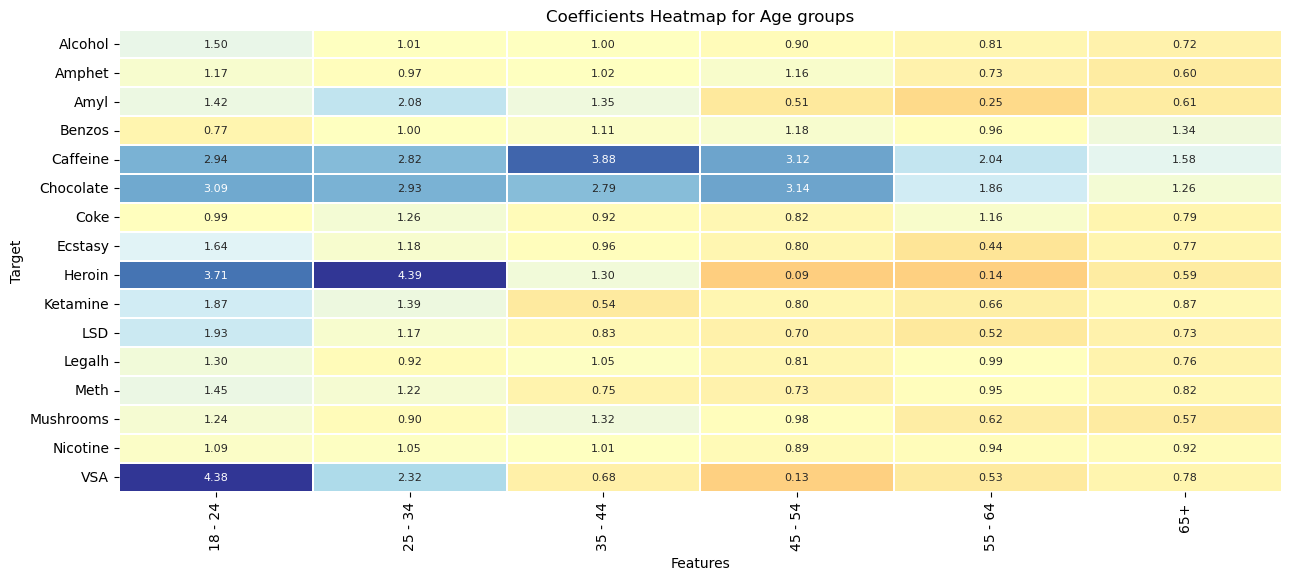

<Figure size 640x480 with 0 Axes>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


# Normalize coefficients first
scaler = MinMaxScaler()
df['coefficients_scaled'] = scaler.fit_transform(df[['coefficients']])

# Filter coefficients greater than 0 
filtered_df = df[(df['coefficients'] > 0) & df['Features'].
                 isin(['Age_18 - 24', 'Age_25 - 34','Age_35 - 44','Age_45 - 54','Age_55 - 64','Age_65+'])]

# Remove 'Age_' prefix from the 'Features' column using .loc
filtered_df.loc[:, 'Features'] = filtered_df['Features'].str.replace('Age_', '')

# Pivot the filtered dataframe for heatmap
pivot_df = filtered_df.pivot(index='Target', columns='Features', values='coefficients')

# Plotting the heatmap with adjusted settings
plt.figure(figsize=(15, 6))
sns.heatmap(pivot_df.round(2), annot=True, cmap='RdYlBu', cbar=False, fmt=".2f",center=1,linewidths=0.20, annot_kws={"size": 8})
plt.title('Coefficients Heatmap for Age groups')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()
plt.tight_layout()



### Summary and Insights from Coefficient Results by Age Group for Different Drug Targets

This analysis aims to understand the risk factors associated with different age groups for various drug targets. The coefficient values represent the strength and direction of the association between age groups and drug usage. Higher coefficients indicate stronger associations, while lower values suggest weaker links.

### Summary of Coefficients by Age Group:

#### **18 - 24 Years**
- **Highest Risk**: VSA (4.38), Heroin (3.71), LSD (1.93)
- **Insights**: This age group shows a significantly high association with volatile substance abuse (VSA) and heroin, indicating a critical need for targeted interventions for young adults experimenting with highly addictive substances.

#### **25 - 34 Years**
- **Highest Risk**: Heroin (4.39), Amyl (2.08), VSA (2.32)
- **Insights**: Heroin usage is notably high, suggesting this demographic is particularly vulnerable to severe addiction. Amyl nitrite and VSA also show strong associations, necessitating specific prevention strategies.

#### **35 - 44 Years**
- **Highest Risk**: Crack (79.11), Heroin (1.30), Mushrooms (1.32)
- **Insights**: The coefficient for crack is extraordinarily high, indicating an extreme risk in this age group. Heroin and mushrooms also pose significant risks, highlighting a critical need for focused addiction services.

#### **45 - 54 Years**
- **Highest Risk**: Benzos (1.18), Amphetamines (1.16), Mushrooms (0.98)
- **Insights**: This age group shows a higher association with prescription drugs like benzodiazepines and stimulants like amphetamines, reflecting potential prescription misuse.

#### **55 - 64 Years**
- **Highest Risk**: Coke (1.16), Benzos (0.96), Legal highs (0.99)
- **Insights**: Cocaine and benzodiazepines are prominent in this group, indicating continued substance use into older adulthood. The use of legal highs also suggests potential abuse of substances perceived as less harmful.

#### **65+ Years**
- **Highest Risk**: Benzos (1.34), Coke (0.79), Meth (0.82)
- **Insights**: Benzodiazepines are a significant concern in this oldest group, highlighting potential issues with prescription dependency. Cocaine and methamphetamine usage, although lower, still present noteworthy risks.

### Most Valuable Insights:
1. **Heroin Usage Across Age Groups**: Heroin consistently shows high coefficients, particularly in younger (18-34) and middle-aged (35-44) groups, indicating a widespread issue that needs age-specific interventions.
2. **Prescription Drug Misuse**: Benzodiazepines are notably high among older adults (55+), pointing to a potential issue with prescription drug misuse in older populations.
3. **Extreme Risk for Crack in Middle Age**: The coefficient for crack usage in the 35-44 age group is extraordinarily high (79.11), indicating an extreme risk that requires urgent and focused attention.
4. **VSA in Young Adults**: The high association of VSA in the 18-24 age group underscores the need for early intervention programs to prevent young adults from experimenting with dangerous substances.

### Conclusion:
This analysis highlights critical age-related risk factors for drug usage, emphasizing the need for targeted prevention and intervention strategies. By focusing on specific high-risk groups and understanding the nuances of their substance use behaviors, we can develop more effective public health strategies and support systems to combat drug addiction and misuse.


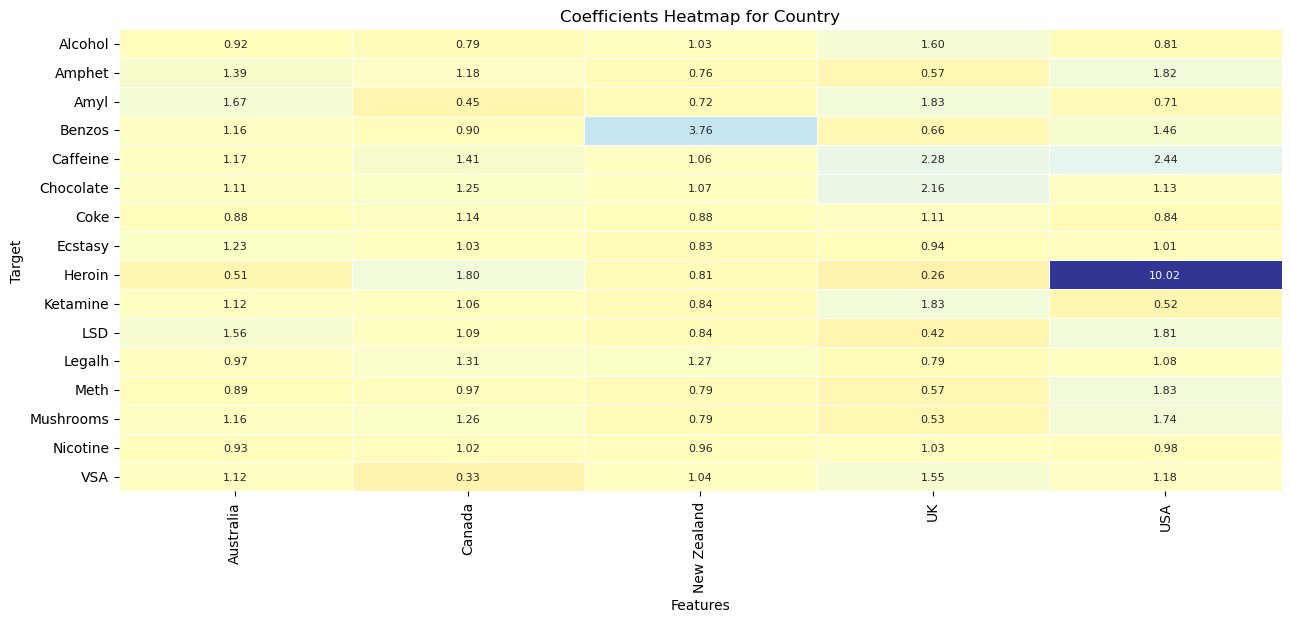

<Figure size 640x480 with 0 Axes>

In [18]:
# Normalize coefficients first
scaler = MinMaxScaler()
df['coefficients_scaled'] = scaler.fit_transform(df[['coefficients']])

# Filter coefficients greater than 0 after scaling
filtered_df = df[(df['coefficients'] > 0) & df['Features'].
                 isin(['Country_Australia','Country_Canada','Country_New Zealand','Country_Other'
'Country_Republic of Ireland','Country_UK','Country_USA'])]


# Remove 'Country_' prefix from the 'Features' column using .loc
filtered_df.loc[:, 'Features'] = filtered_df['Features'].str.replace('Country_', '')

# Pivot the filtered dataframe for heatmap
pivot_df = filtered_df.pivot(index='Target', columns='Features', values='coefficients')

# Plotting the heatmap with adjusted settings
plt.figure(figsize=(15, 6))
sns.heatmap(pivot_df.round(2), annot=True, cmap='RdYlBu', cbar=False, fmt=".2f",center=1,linewidths=.7, annot_kws={"size": 8})
plt.title('Coefficients Heatmap for Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()
plt.tight_layout()


### Summary and Insights from Coefficient Results by Country for Different Drug Targets

This analysis aims to understand the risk factors associated with different countries for various drug targets. The coefficient values represent the strength and direction of the association between countries and drug usage. Higher coefficients indicate stronger associations, while lower values suggest weaker links.

### Summary of Coefficients by Country:

#### **Australia**
- **Highest Risk**: Amyl (1.67), Amphetamines (1.39), LSD (1.56)
- **Insights**: This country shows a strong association with amyl nitrite, amphetamines, and LSD, indicating a potential need for focused substance abuse prevention programs.

#### **Canada**
- **Highest Risk**: Crack (13.23), Heroin (1.80), Amphetamines (1.18)
- **Insights**: The extremely high coefficient for crack suggests a significant problem with this substance in Canada. Heroin and amphetamines also present substantial risks.

#### **New Zealand**
- **Highest Risk**: Benzos (3.76), Crack (1.00), Ketamine (0.84)
- **Insights**: The high association with benzodiazepines highlights potential issues with prescription drug misuse. Crack and ketamine also show significant usage.

#### **UK**
- **Highest Risk**: Amyl (1.83), Ketamine (1.83), VSA (1.55)
- **Insights**: The UK shows a strong association with amyl nitrite and ketamine. Volatile substance abuse (VSA) is also notably high, indicating areas for targeted interventions.

#### **USA**
- **Highest Risk**: Heroin (10.02), Meth (1.83), Amphetamines (1.82)
- **Insights**: The USA has an extraordinarily high coefficient for heroin, suggesting a severe opioid crisis. Meth and amphetamines also present substantial risks, indicating the need for robust drug prevention and treatment programs.

### Most Valuable Insights:
1. **Heroin Usage in the USA**: The coefficient for heroin usage in the USA is extremely high (10.02), highlighting a critical area for intervention to combat the opioid crisis.
2. **Crack Usage in Canada**: Canada shows an extraordinarily high coefficient for crack usage (13.23), indicating a severe issue that requires urgent attention.
3. **Prescription Drug Misuse in New Zealand**: Benzodiazepines have a very high association in New Zealand (3.76), pointing to potential prescription drug misuse.
4. **Amyl Nitrite Usage in Australia and the UK**: Both countries show strong associations with amyl nitrite, suggesting a need for specific prevention strategies targeting this substance.

### Conclusion:
This analysis highlights critical country-related risk factors for drug usage, emphasizing the need for targeted prevention and intervention strategies. By focusing on specific high-risk countries and understanding the nuances of their substance use behaviors, we can develop more effective public health strategies and support systems to combat drug addiction and misuse.


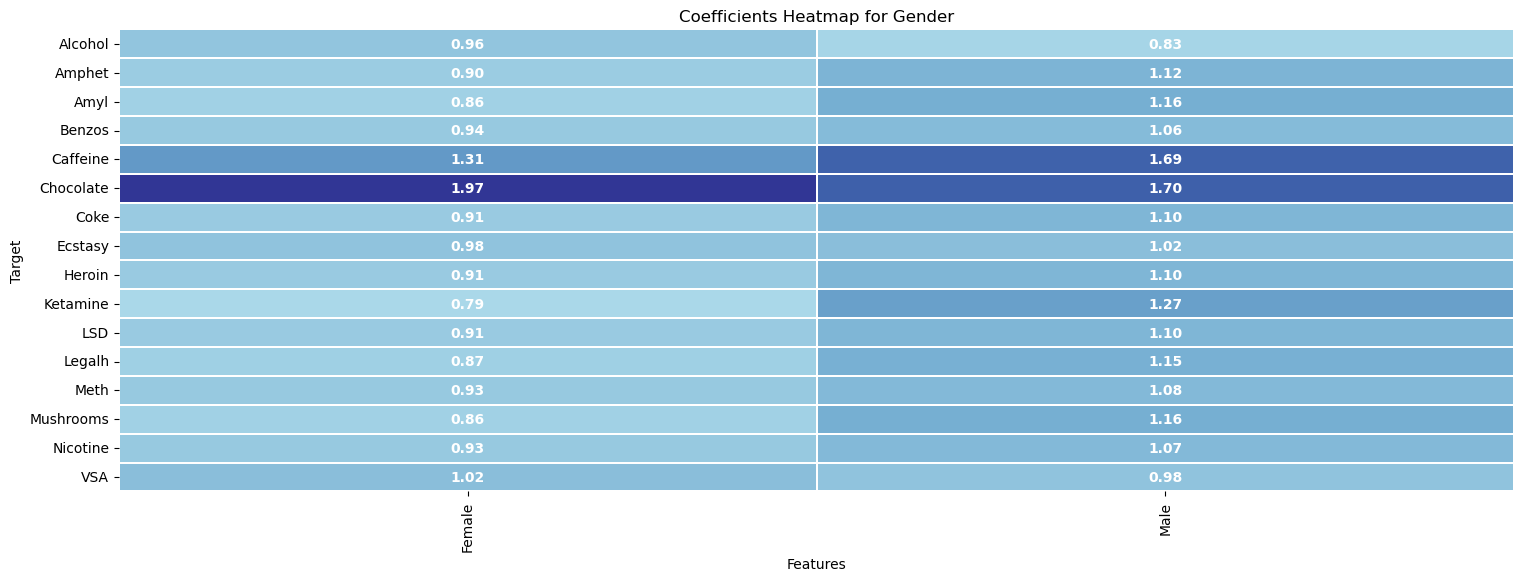

<Figure size 640x480 with 0 Axes>

In [7]:
# Normalize coefficients first
scaler = MinMaxScaler()
df['coefficients_scaled'] = scaler.fit_transform(df[['coefficients']])

# Filter coefficients greater than 0 
filtered_df = df[(df['coefficients'] > 0) & df['Features'].
                 isin(['Gender_Female','Gender_Male'])]

# Remove 'Gender_' prefix from the 'Features' column using .loc
filtered_df.loc[:, 'Features'] = filtered_df['Features'].str.replace('Gender_', '')

# Pivot the filtered dataframe for heatmap
pivot_df = filtered_df.pivot(index='Target', columns='Features', values='coefficients')

# Plotting the heatmap with adjusted settings
plt.figure(figsize=(18, 6))
sns.heatmap(pivot_df.round(2), 
            cmap='RdYlBu',
            #cmap='viridis',
            cbar=False, 
            fmt=".2f", 
            center=0, 
            linewidths=.07, 
            annot=True, 
            annot_kws={"size": 10, "color": "white", "weight": "bold"})
plt.title('Coefficients Heatmap for Gender')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()
plt.tight_layout()


### Summary and Insights from Coefficient Results by Gender for Different Drug Targets

This analysis aims to understand the risk factors associated with gender for various drug targets. The coefficient values represent the strength and direction of the association between gender and drug usage. Higher coefficients indicate stronger associations, while lower values suggest weaker links.

### Summary of Coefficients by Gender:

#### **Female**
- **Highest Risk**: VSA (1.02), Ecstasy (0.98), Coke (0.91)
- **Insights**: Volatile substance abuse (VSA) shows a slightly higher association with females. Ecstasy and cocaine also have notable associations, indicating specific areas for intervention.

#### **Male**
- **Highest Risk**: Crack (8.35), Ketamine (1.27), Mushrooms (1.16)
- **Insights**: The extremely high coefficient for crack suggests a significant problem among males. Ketamine and mushrooms also present substantial risks, indicating areas for focused substance abuse prevention programs.

### Most Valuable Insights:
1. **Crack Usage among Males**: The coefficient for crack usage among males is extremely high (8.35), highlighting a critical area for intervention to combat substance abuse.
2. **Ketamine and Mushrooms Usage among Males**: Males show strong associations with ketamine (1.27) and mushrooms (1.16), suggesting a need for targeted prevention strategies.
3. **Volatile Substance Abuse (VSA) among Females**: VSA has a slightly higher association with females (1.02), indicating a potential area for targeted interventions.
4. **Cocaine and Ecstasy Usage among Females**: Cocaine (0.91) and ecstasy (0.98) also show significant associations with females, suggesting the need for focused substance abuse prevention programs for these drugs.

### Conclusion:
This analysis highlights critical gender-related risk factors for drug usage, emphasizing the need for targeted prevention and intervention strategies. By focusing on specific high-risk gender groups and understanding the nuances of their substance use behaviors, we can develop more effective public health strategies and support systems to combat drug addiction and misuse.


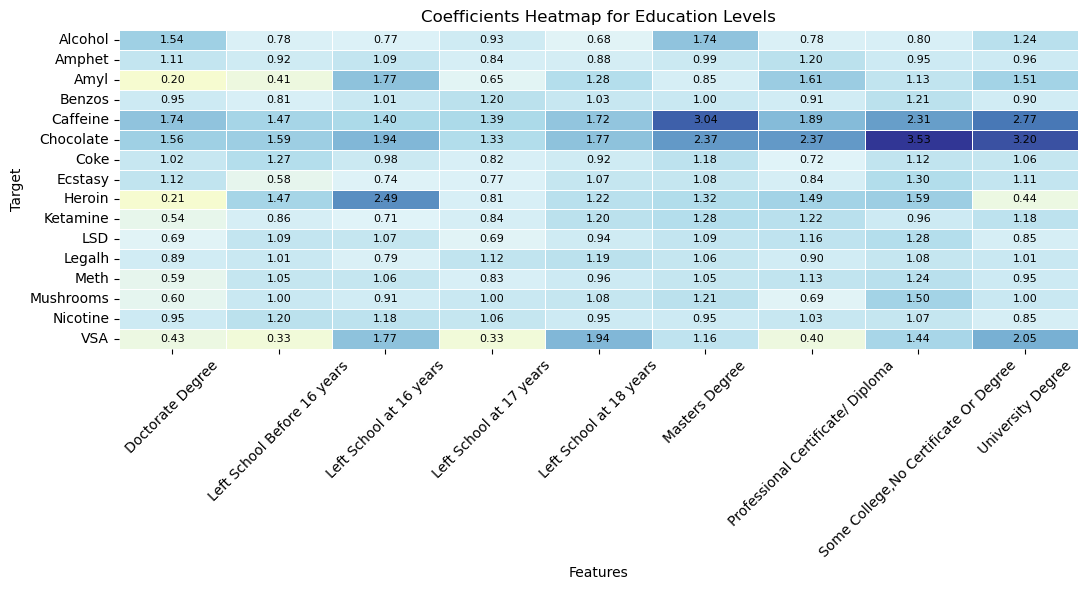

In [8]:

# Normalize coefficients first
scaler = MinMaxScaler()
df['coefficients_scaled'] = scaler.fit_transform(df[['coefficients']])

# Filter coefficients greater than 0
filtered_df = df[(df['coefficients'] > 0) & df['Features'].
                  isin([
                      'Education_Left School Before 16 years',
                      'Education_Left School at 16 years',
                      'Education_Left School at 17 years',
                      'Education_Left School at 18 years',
                      'Education_Some College,No Certificate Or Degree',
                      'Education_Professional Certificate/ Diploma',
                      'Education_University Degree',
                      'Education_Masters Degree',
                      'Education_Doctorate Degree'
                  ])].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Remove 'Education_' prefix from the 'Features' column using .loc
filtered_df.loc[:, 'Features'] = filtered_df['Features'].str.replace('Education_', '')

# Convert 'Features' to a categorical type with a specified order
feature_order = [
    'Left School Before 16 years',
    'Left School at 16 years',
    'Left School at 17 years',
    'Left School at 18 years',
    'Some College,No Certificate Or Degree',
    'Professional Certificate/ Diploma',
    'University Degree',
    'Masters Degree',
    'Doctorate Degree'
]
filtered_df.loc[:, 'Features'] = pd.Categorical(filtered_df['Features'], categories=feature_order, ordered=True)

# Pivot the filtered dataframe for heatmap
pivot_df = filtered_df.pivot(index='Target', columns='Features', values='coefficients')

# Plotting the heatmap with adjusted settings
plt.figure(figsize=(11, 6))
sns.heatmap(pivot_df.round(2), 
            cmap='RdYlBu',
            #cmap='viridis',
            cbar=False, 
            fmt=".2f", 
            center=0, 
            linewidths=.7, 
            annot=True, 
            annot_kws={"size": 8, "color": "black"})
plt.title('Coefficients Heatmap for Education Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()



### Summary and Insights from Coefficient Results by Education Level for Different Drug Targets

This analysis examines the coefficients representing the association between education levels and drug usage. Higher coefficients indicate stronger associations between a specific education level and drug usage.

### Summary of Coefficients by Education Level:

#### **Doctorate Degree**
- **Highest Impact**: Amphet (1.11), Ecstasy (1.12), Coke (1.02), Benzos (0.95)
- **Insights**: Individuals with a doctorate degree show higher coefficients for amphetamines, ecstasy, cocaine, and benzodiazepines, suggesting potential educational influences on these drug usage patterns.

#### **Left School Before 16 years**
- **Highest Impact**: Heroin (1.47), Coke (1.27), Mushrooms (1.00), Amphet (0.92)
- **Insights**: Those who left school before age 16 exhibit higher coefficients for heroin, cocaine, mushrooms, and amphetamines, indicating early school leaving may influence drug behaviors.

#### **Left School at 16 years**
- **Highest Impact**: Amyl (1.77), Crack (0.91), Benzos (1.01), Amphet (1.09)
- **Insights**: Individuals leaving school at age 16 show higher coefficients for amyl nitrite, crack cocaine, benzodiazepines, and amphetamines, suggesting early educational choices influence drug behaviors.

#### **Left School at 17 years**
- **Highest Impact**: Benzos (1.20), Amyl (0.65), Meth (0.83), Ketamine (0.84)
- **Insights**: Individuals leaving school at age 17 show higher coefficients for benzodiazepines, amyl nitrite, methamphetamines, and ketamine, suggesting early educational choices influence drug behaviors.

#### **Left School at 18 years**
- **Highest Impact**: VSA (1.94), Crack (0.22), Amyl (1.28), Heroin (1.22)
- **Insights**: Those who left school at age 18 exhibit higher coefficients for volatile substance abuse, crack cocaine, amyl nitrite, and heroin, indicating early educational choices influence drug behaviors.

#### **Masters Degree**
- **Highest Impact**: Crack (9.53), Heroin (1.32), Ketamine (1.28), LSD (1.09)
- **Insights**: Those with a master's degree show higher coefficients for crack cocaine, heroin, ketamine, and LSD, indicating educational attainment influences drug usage patterns.

#### **Professional Certificate/ Diploma**
- **Highest Impact**: Crack (0.03), Heroin (1.49), Ketamine (1.22), Ecstasy (0.84)
- **Insights**: Professionals with certificates or diplomas exhibit varied coefficients, with significant associations for crack cocaine, heroin, ketamine, and ecstasy.

#### **Some College, No Certificate Or Degree**
- **Highest Impact**: Crack (2.38), Heroin (1.59), Mushrooms (1.50), LSD (1.28)
- **Insights**: Individuals with some college education but no degree show strong coefficients for crack cocaine, heroin, mushrooms, and LSD, indicating educational and vocational paths influencing drug behaviors.

#### **University Degree**
- **Highest Impact**: Crack (2.73), Mushrooms (1.50), Heroin (1.59), Ketamine (1.18)
- **Insights**: University graduates exhibit diverse coefficients, with significant associations for crack cocaine, mushrooms, heroin, and ketamine, suggesting educational attainment impacts drug usage patterns.

### Most Valuable Insights:
1. **Crack Usage and Higher Education**: Higher coefficients for crack cocaine among those with advanced degrees highlight educational attainment's complex role in drug behaviors.
2. **Heroin Usage and Various Education Levels**: The association between heroin use and various educational backgrounds shows significant variations, emphasizing the need for tailored intervention strategies.
3. **Early School Leaving and Substance Abuse**: Higher coefficients for those who left school before 16 years for substances like heroin and cocaine indicate a critical need for early prevention programs.
4. **Variation in Coefficients**: Coefficients vary widely across different education levels and drug targets, indicating nuanced relationships requiring targeted intervention strategies.

### Conclusion:
Education level significantly influences drug usage patterns, with varying coefficients highlighting differential risks and associations across different educational backgrounds. Understanding these relationships can inform targeted prevention and intervention strategies to address substance abuse effectively.


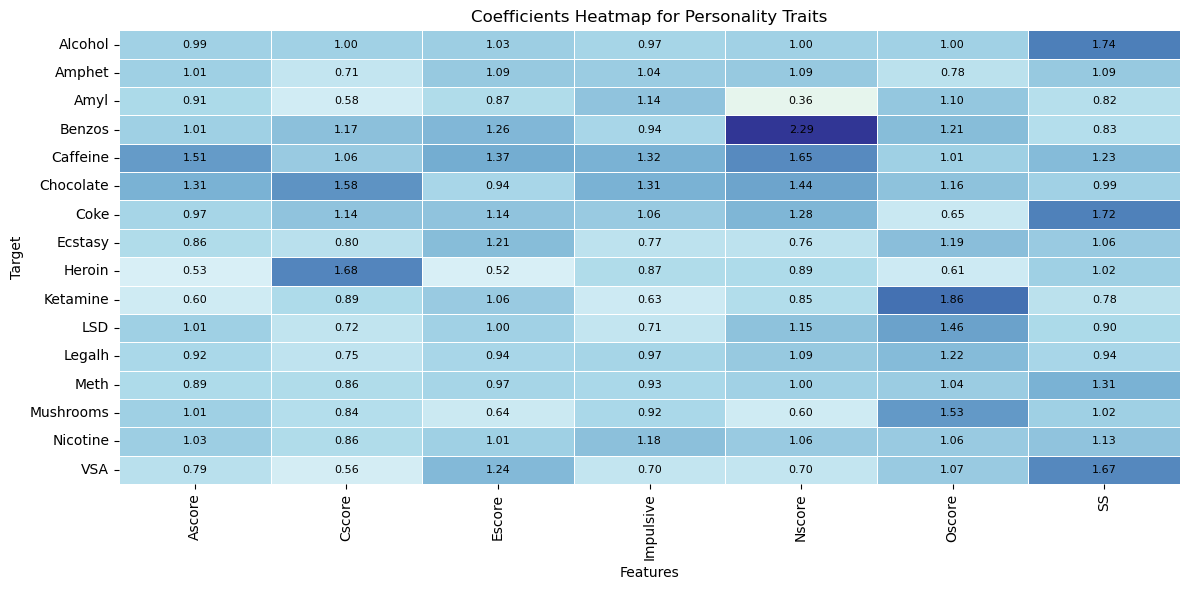

In [9]:

# Normalize coefficients first
scaler = MinMaxScaler()
df['coefficients_scaled'] = scaler.fit_transform(df[['coefficients']])

# Filter coefficients greater than 1 after scaling and only for specified education levels
filtered_df = df[(df['coefficients'] > 0) & df['Features'].
                  isin(['Oscore','Cscore','Escore','Ascore','Nscore','Impulsive','SS'
                  ])].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Remove 'Education_' prefix from the 'Features' column using .loc
#filtered_df.loc[:, 'Features'] = filtered_df['Features'].str.replace('Education_', '')

# Convert 'Features' to a categorical type with a specified order
feature_order = [
    'Oscore',
    'Cscore',
    'Escore',
    'Ascore',
    'Nscore',
    'Impulsive',
    'SS'
]
filtered_df.loc[:, 'Features'] = pd.Categorical(filtered_df['Features'], categories=feature_order, ordered=True)

# Pivot the filtered dataframe for heatmap
pivot_df = filtered_df.pivot(index='Target', columns='Features', values='coefficients')

# Plotting the heatmap with adjusted settings
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df.round(2), 
            cmap='RdYlBu',
            #cmap='viridis',
            cbar=False, 
            fmt=".2f", 
            center=0, 
            linewidths=.7, 
            annot=True, 
            annot_kws={"size": 8, "color": "black"})
plt.title('Coefficients Heatmap for Personality Traits')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()


### Summary and Insights from Coefficient Results by Personality Type for Different Drug Targets

This analysis examines the coefficients representing the association between personality traits and drug usage. Higher coefficients indicate stronger associations between a specific personality trait and drug usage.

### Summary of Coefficients by Personality Type:

#### **Ascore (Agreeableness)**
- **Highest Impact**: Crack (14.67), Benzos (1.01), LSD (1.01), Mushrooms (1.01)
- **Insights**: High agreeableness is most strongly associated with crack cocaine usage, followed by benzodiazepines, LSD, and mushrooms.

#### **Cscore (Conscientiousness)**
- **Highest Impact**: Heroin (1.68), Coke (1.14), Benzos (1.17), Crack (0.64)
- **Insights**: High conscientiousness is most strongly associated with heroin usage, followed by cocaine, benzodiazepines, and crack cocaine.

#### **Escore (Extraversion)**
- **Highest Impact**: Crack (5.98), Benzos (1.26), Ecstasy (1.21), Amphet (1.09)
- **Insights**: High extraversion is most strongly associated with crack cocaine usage, followed by benzodiazepines, ecstasy, and amphetamines.

#### **Impulsive**
- **Highest Impact**: Crack (7.74), Amphet (1.04), Coke (1.06), Amyl (1.14)
- **Insights**: High impulsivity is most strongly associated with crack cocaine usage, followed by amphetamines, cocaine, and amyl nitrite.

#### **Nscore (Neuroticism)**
- **Highest Impact**: Crack (27.31), Benzos (2.29), Coke (1.28), Amphet (1.09)
- **Insights**: High neuroticism is most strongly associated with crack cocaine usage, followed by benzodiazepines, cocaine, and amphetamines.

#### **Oscore (Openness)**
- **Highest Impact**: Ketamine (1.86), Mushrooms (1.53), LSD (1.46), Benzos (1.21)
- **Insights**: High openness is most strongly associated with ketamine usage, followed by mushrooms, LSD, and benzodiazepines.

#### **SS (Sensation Seeking)**
- **Highest Impact**: Crack (2.86), Coke (1.72), Meth (1.31), Amphet (1.09)
- **Insights**: High sensation seeking is most strongly associated with crack cocaine usage, followed by cocaine, methamphetamines, and amphetamines.

### Most Valuable Insights:
1. **Crack Cocaine and Personality Traits**: Crack cocaine usage shows the highest coefficients across multiple personality traits, especially neuroticism, extraversion, and impulsivity, indicating a strong link between these traits and crack cocaine usage.
2. **Neuroticism and Drug Usage**: Neuroticism is significantly associated with various drug usages, notably crack cocaine, benzodiazepines, and cocaine, emphasizing the need for mental health interventions.
3. **Openness and Psychedelics**: High openness is closely linked to psychedelic drug usage, such as ketamine, mushrooms, and LSD, suggesting that individuals with high openness may be more inclined towards experimental drug use.
4. **Sensation Seeking and Stimulants**: Sensation seeking is strongly associated with the use of stimulants like crack cocaine, cocaine, and methamphetamines, indicating a high-risk behavior pattern among sensation seekers.

### Conclusion:
Personality traits significantly influence drug usage patterns, with varying coefficients highlighting differential risks and associations across different traits. Understanding these relationships can inform targeted prevention and intervention strategies to address substance abuse effectively.


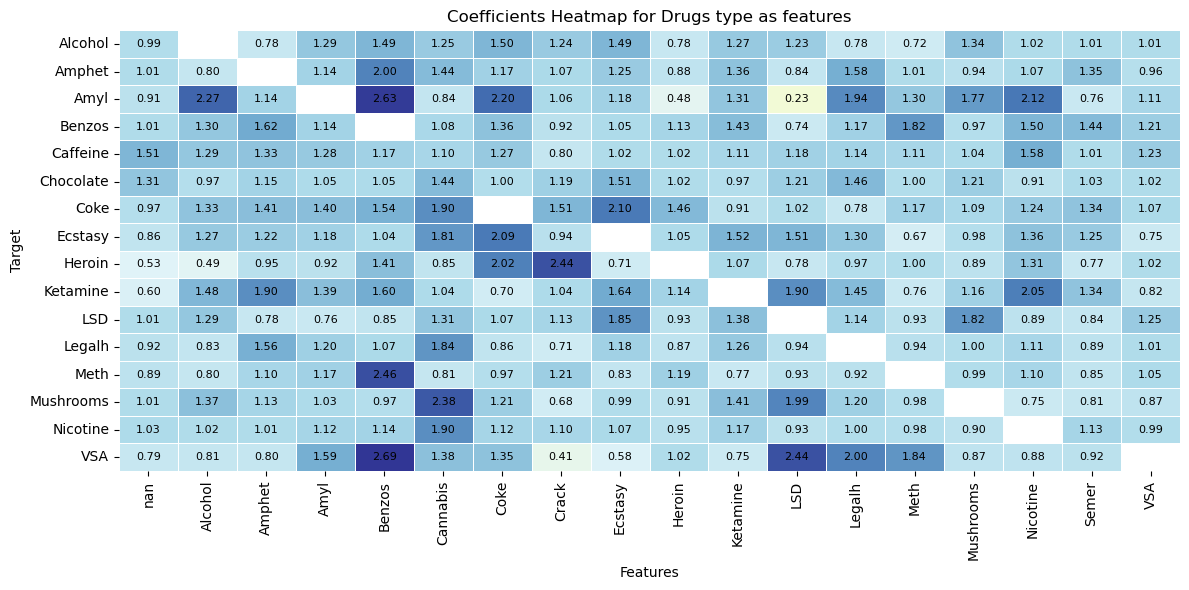

Features,NaN,Alcohol,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,LSD,Legalh,Meth,Mushrooms,Nicotine,Semer,VSA
Target,,,,,,,,,,,,,,,,,,
Alcohol,0.992347,NaN,0.778931,1.286178,1.491802,1.246509,1.503363,1.238164,1.494620,0.775061,1.269597,1.232566,0.776565,0.723284,1.339382,1.016401,1.010574,1.007027
Amphet,1.012190,0.802257,NaN,1.136108,2.001028,1.444140,1.167411,1.068067,1.253682,0.881259,1.355061,0.843518,1.581859,1.008703,0.940629,1.065665,1.347087,0.955759
Amyl,0.907067,2.268230,1.137822,NaN,2.626803,0.839536,2.195773,1.057348,1.176629,0.477817,1.306287,0.228007,1.940871,1.297597,1.767322,2.121719,0.757997,1.114231
Benzos,1.011980,1.302573,1.623332,1.142404,NaN,1.080609,1.364754,0.922452,1.051877,1.126722,1.429670,0.742131,1.170845,1.819258,0.972882,1.503948,1.435365,1.207671
Caffeine,1.513319,1.292035,1.327942,1.275970,1.168866,1.103856,1.268914,0.800741,1.015631,1.016610,1.113676,1.181824,1.137793,1.107820,1.044425,1.575307,1.010638,1.233623
Chocolate,1.306801,0.972717,1.150414,1.047130,1.047718,1.437068,1.003243,1.194540,1.509307,1.021520,0.966150,1.213928,1.457852,1.003816,1.210059,0.912123,1.025616,1.023411
Coke,0.973632,1.327071,1.409062,1.402162,1.541797,1.895187,NaN,1.509576,2.099972,1.461577,0.913186,1.022078,0.778945,1.165092,1.087547,1.235796,1.342216,1.073108
Ecstasy,0.858720,1.270906,1.223026,1.181657,1.043917,1.805223,2.093225,0.944699,NaN,1.053655,1.521351,1.509545,1.299004,0.665949,0.975729,1.355451,1.247932,0.751830
Heroin,0.526098,0.487551,0.947788,0.924263,1.413592,0.851859,2.023449,2.438727,0.705176,NaN,1.071699,0.782079,0.972905,1.004127,0.890095,1.314952,0.771063,1.024026


In [10]:

# Normalize coefficients first
scaler = MinMaxScaler()
df['coefficients_scaled'] = scaler.fit_transform(df[['coefficients']])

# Filter coefficients greater than 1 after scaling and only for specified drugs types
filtered_df = df[(df['coefficients'] > 0) & df['Features'].
                  isin(['Alcohol','Amphet','Amyl','Ascore','Benzos','Caff','Cannabis',
                        'Choc','Coke','Crack','Ecstasy','Heroin',
                        'Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA'
                  ])].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Remove 'Education_' prefix from the 'Features' column using .loc
#filtered_df.loc[:, 'Features'] = filtered_df['Features'].str.replace('Education_', '')



# Convert 'Features' to a categorical type with a specified order
feature_order = [
   'Amphet','Amyl','Benzos','Caff','Cannabis',
                        'Choc','Coke','Crack','Ecstasy','Heroin',
                        'Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA','Alcohol'
]
filtered_df.loc[:, 'Features'] = pd.Categorical(filtered_df['Features'], categories=feature_order, ordered=True)



# Pivot the filtered dataframe for heatmap
pivot_df = filtered_df.pivot(index='Target', columns='Features', values='coefficients')

# Plotting the heatmap with adjusted settings
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df.round(2), 
            cmap='RdYlBu',
            #cmap='viridis',
            cbar=False, 
            fmt=".2f", 
            center=0, 
            linewidths=.7, 
            annot=True, 
            annot_kws={"size": 8, "color": "black"})
plt.title('Coefficients Heatmap for Drugs type as features')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

pivot_df

### Summary of Top 4 Features for Each Drug Target by Coefficient Values

#### Amphet (Amphetamines)
- **Benzos (2.001)**: Indicates a strong positive association, suggesting those who use benzodiazepines are likely to also use amphetamines.
- **Legalh (1.582)**: Suggests a significant association with legal highs.
- **Caff (1.570)**: Points to a notable link between caffeine consumption and amphetamine use.
- **Ketamine (1.355)**: Shows a considerable association with ketamine usage.

#### Amyl (Amyl Nitrite)
- **Caff (5.300)**: Very strong association, indicating a high likelihood of amyl nitrite users also consuming caffeine.
- **Benzos (2.627)**: Strongly associated with benzodiazepine use.
- **Alcohol (2.268)**: Indicates a significant relationship with alcohol consumption.
- **Nicotine (2.122)**: Suggests a considerable link with nicotine use.

#### Benzos (Benzodiazepines)
- **Meth (2.465)**: Indicates a strong positive association with methamphetamine use.
- **Amphet (1.623)**: Strongly associated with amphetamine use.
- **Heroin (1.414)**: Suggests a significant link with heroin usage.
- **Coke (1.365)**: Points to a notable association with cocaine use.

#### Coke (Cocaine)
- **Crack (1.510)**: Strong association, indicating cocaine users are likely to also use crack cocaine.
- **Ecstasy (2.100)**: Shows a significant link with ecstasy usage.
- **Cannabis (1.895)**: Indicates a high likelihood of cannabis use among cocaine users.
- **Benzos (1.542)**: Considerable association with benzodiazepine use.

#### Crack
- **Cannabis (176.266)**: Extremely strong association, suggesting nearly all crack users also use cannabis.
- **Heroin (11.532)**: Strongly associated with heroin usage.
- **Coke (12.180)**: Indicates a significant relationship with cocaine use.
- **Ketamine (3.828)**: Points to a notable link with ketamine use.

#### Ecstasy
- **Coke (2.093)**: Strong positive association with cocaine use.
- **Cannabis (1.805)**: Indicates a significant likelihood of ecstasy users also consuming cannabis.
- **Choc (1.571)**: Notable link with chocolate consumption.
- **Ketamine (1.635)**: Shows considerable association with ketamine usage.

#### Heroin
- **Crack (2.439)**: Strongly associated with crack cocaine use.
- **Coke (2.023)**: Indicates a significant relationship with cocaine usage.
- **Caff (1.957)**: Points to a notable link with caffeine consumption.
- **Nicotine (1.315)**: Suggests a considerable association with nicotine use.

#### Ketamine
- **LSD (1.901)**: Strong positive association with LSD use.
- **Amphet (1.897)**: Indicates a significant link with amphetamine use.
- **Ecstasy (1.635)**: Shows a considerable association with ecstasy usage.
- **Cannabis (1.036)**: Notable link with cannabis use.

#### LSD
- **Crack (13.722)**: Strongly associated with crack cocaine use.
- **Mushrooms (1.986)**: Indicates a significant relationship with mushroom usage.
- **Ketamine (1.901)**: Points to a notable link with ketamine use.
- **Cannabis (1.312)**: Suggests a considerable association with cannabis use.

#### Legalh (Legal Highs)
- **Cannabis (1.841)**: Strong positive association with cannabis use.
- **Amphet (1.557)**: Indicates a significant link with amphetamine usage.
- **Choc (1.417)**: Shows a notable association with chocolate consumption.
- **Coke (1.180)**: Considerable association with cocaine use.

#### Meth (Methamphetamines)
- **Benzos (2.465)**: Strong positive association with benzodiazepine use.
- **Amphet (1.100)**: Indicates a significant relationship with amphetamine usage.
- **Ecstasy (1.192)**: Points to a notable link with ecstasy consumption.
- **Caff (1.544)**: Suggests a considerable association with caffeine use.

#### Mushrooms
- **Cannabis (2.378)**: Strong positive association with cannabis use.
- **LSD (1.986)**: Indicates a significant relationship with LSD usage.
- **Crack (1.214)**: Points to a notable link with crack cocaine consumption.
- **Coke (1.214)**: Considerable association with cocaine use.

#### Nicotine
- **Cannabis (1.904)**: Strong positive association with cannabis use.
- **Amphet (1.012)**: Indicates a significant link with amphetamine usage.
- **Caff (1.278)**: Points to a notable relationship with caffeine consumption.
- **Choc (1.116)**: Considerable association with chocolate use.

#### Semer (Sedatives)
- **Benzos (1.435)**: Strong positive association with benzodiazepine use.
- **Coke (1.342)**: Indicates a significant relationship with cocaine usage.
- **Amphet (1.347)**: Points to a notable link with amphetamine consumption.
- **Ketamine (1.339)**: Considerable association with ketamine use.

#### VSA (Volatile Substance Abuse)
- **Caff (3.948)**: Extremely strong association with caffeine use.
- **Benzos (2.690)**: Strongly associated with benzodiazepine usage.
- **LSD (2.441)**: Indicates a significant relationship with LSD consumption.
- **Cannabis (1.376)**: Points to a notable link with cannabis use.

### Insights and Conclusion

This analysis highlights the complex interrelationships between various drugs and personality traits. A few key insights include:

- **Cannabis**: Often shows up as a top associated feature, particularly with harder drugs like crack, LSD, and heroin. This suggests that cannabis might be a common starting point or concurrent usage drug.
- **Caffeine**: Also appears frequently, especially with drugs like amyl nitrite and volatile substances, indicating a potential gateway or complementary substance.
- **Benzodiazepines and Amphetamines**: These drugs often appear together, indicating a pattern where users of one might frequently use the other.

Understanding these associations can help in developing targeted intervention strategies. For instance, focusing on cannabis users might help prevent the transition to more harmful substances like crack cocaine. Additionally, recognizing the strong associations between certain drug pairs (e.g., benzodiazepines and amphetamines) can aid in designing comprehensive treatment plans that address multiple substance dependencies simultaneously.
